<a href="https://colab.research.google.com/github/hatkiet/Project_4/blob/Mia-branch/Heart_Attack__PCA_ML_3_MH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [3]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("heart_2022_with_nans.csv")
# Display sample data
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
# Find the duplicated values
df.duplicated().sum()

# Drop duplicated values
df.drop_duplicates(inplace=True)

# Check again information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87517 entries, 0 to 87551
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      87517 non-null  object 
 1   Sex                        87517 non-null  object 
 2   GeneralHealth              87255 non-null  object 
 3   PhysicalHealthDays         85065 non-null  float64
 4   MentalHealthDays           85469 non-null  float64
 5   LastCheckupTime            85842 non-null  object 
 6   PhysicalActivities         87286 non-null  object 
 7   SleepHours                 86410 non-null  float64
 8   RemovedTeeth               84112 non-null  object 
 9   HadHeartAttack             86800 non-null  object 
 10  HadAngina                  86577 non-null  object 
 11  HadStroke                  87162 non-null  object 
 12  HadAsthma                  87127 non-null  object 
 13  HadSkinCancer              86807 non-null  object 


In [5]:
# Finding NAN values
nan_values = df.isna().sum().sort_values(ascending=False)
nan_values_percentage = (nan_values/df.shape[0])*100

# Output the DataFrame with two columns nan_values and nan_values_percentage
pd.concat([nan_values, nan_values_percentage], axis=1).rename(columns= {0:"NaN Values", 1:"(%) of NaN Values"}).round(2)

,NaN Values,(%) of NaN Values
TetanusLast10Tdap,17934,20.49
PneumoVaxEver,16939,19.36
HIVTesting,14780,16.89
ChestScan,12478,14.26
CovidPos,12001,13.71
HighRiskLastYear,11886,13.58
FluVaxLast12,11003,12.57
AlcoholDrinkers,10778,12.32
BMI,10232,11.69
WeightInKilograms,8704,9.95


In [66]:
# Renaming columns using a dictionary
df1 = df.rename(columns={
    'AgeCategory': "Age",
    'RaceEthnicityCategory': "Race",
    'GeneralHealth': "GenHealth",
    'PhysicalHealthDays': "PhysicalHealth",
    'PhysicalActivities': "PhysicalActivity",
    'MentalHealthDays': "MentalHealth",
    'HadAngina': "Angina",
    'HadHeartAttack': "HeartAttack",
    'HadStroke': "Stroke",
    'HadAsthma': "Asthma",
    'HadSkinCancer': "SkinCancer",
    'HadDepressiveDisorder': "Depressed",
    'HadKidneyDisease': "KidneyDisease",
    'DifficultyWalking': "DiffWalking",
    'HadDiabetes': "Diabetes",
    'SmokerStatus': "Smoking",
    'AlcoholDrinkers': "Drinking"
})
df1

,State,Sex,GenHealth,PhysicalHealth,MentalHealth,LastCheckupTime,PhysicalActivity,SleepHours,RemovedTeeth,HeartAttack,...,HeightInMeters,WeightInKilograms,BMI,Drinking,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87547,Hawaii,Male,Good,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.75,72.57,23.63,No,NaN,Yes,NaN,NaN,NaN,NaN
87548,Hawaii,Male,Very good,1.0,5.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.91,95.25,26.25,No,Yes,Yes,No,"Yes, received Tdap",Yes,No
87549,Hawaii,Male,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.75,117.93,38.39,Yes,NaN,No,No,NaN,No,Yes
87550,Hawaii,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.70,79.38,27.41,Yes,Yes,Yes,No,"Yes, received Tdap",No,No


In [67]:
# Remove the missing values
df1 = df1.dropna()

# Check again the missing values
df1.isna().sum()

State                        0
Sex                          0
GenHealth                    0
PhysicalHealth               0
MentalHealth                 0
LastCheckupTime              0
PhysicalActivity             0
SleepHours                   0
RemovedTeeth                 0
HeartAttack                  0
Angina                       0
Stroke                       0
Asthma                       0
SkinCancer                   0
HadCOPD                      0
Depressed                    0
KidneyDisease                0
HadArthritis                 0
Diabetes                     0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DiffWalking                  0
DifficultyDressingBathing    0
DifficultyErrands            0
Smoking                      0
ECigaretteUsage              0
ChestScan                    0
Race                         0
Age                          0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [68]:
!pip install hvplot
import hvplot.pandas
df1.hvplot.scatter(
    x="Age",
    y="GenHealth",
    by="HeartAttack"
)


:NdOverlay   [HeartAttack]
   :Scatter   [Age]   (GenHealth)

In [89]:
df1.columns

Index(['State', 'Sex', 'GenHealth', 'PhysicalHealth', 'MentalHealth',
       'LastCheckupTime', 'PhysicalActivity', 'SleepHours', 'RemovedTeeth',
       'HeartAttack', 'Angina', 'Stroke', 'Asthma', 'SkinCancer', 'HadCOPD',
       'Depressed', 'KidneyDisease', 'HadArthritis', 'Diabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DiffWalking', 'DifficultyDressingBathing',
       'DifficultyErrands', 'Smoking', 'ECigaretteUsage', 'ChestScan', 'Race',
       'Age', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'Drinking',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [69]:
# Import PCA module
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [70]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=3)

In [71]:
# Assuming 'df1' is your DataFrame
# Select only numerical columns for PCA
numerical_cols = df1.select_dtypes(include=['number']).columns
df_numerical = df1[numerical_cols]

# Instantiate the PCA instance
pca = PCA(n_components=3)

# Fit the PCA model on the numerical data
df1_transformed = pca.fit_transform(df_numerical)

# Review the first 5 rows of the transformed data
df1_transformed[:5]

array([[-10.60982507,  -2.53664591,  -3.16167797],
       [ 12.56103278,  -6.59246041,  -0.19428155],
       [ 26.08513775,  -7.26918061,  -0.08183674],
       [  8.67441075,  -2.660908  ,  -3.6236517 ],
       [ -1.58146547,   6.50970657,   8.83897265]])

In [72]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.75574543, 0.14734041, 0.07712219])

In [73]:
# Create the PCA DataFrame
pca_df = pd.DataFrame(df1_transformed, columns=['PC1', 'PC2', 'PC3'])

#Review the PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
0,-10.609825,-2.536646,-3.161678
1,12.561033,-6.592460,-0.194282
2,26.085138,-7.269181,-0.081837
3,8.674411,-2.660908,-3.623652
4,-1.581465,6.509707,8.838973


In [74]:
!pip install hvplot
import hvplot.pandas

# Create a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Apppend the value of the computed intertia from the 'inertia_' attribute of the KMeans model instance
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,2.826676e+07
1,2,1.500374e+07
2,3,1.097907e+07
3,4,9.029957e+06
4,5,7.487783e+06


In [75]:
# Plot the DataFrame using the DataFrame variable, not the dictionary
df_elbow.hvplot.line(x='k', y='inertia', title='Elbow Curve', xticks=k)

:Curve   [k]   (inertia)

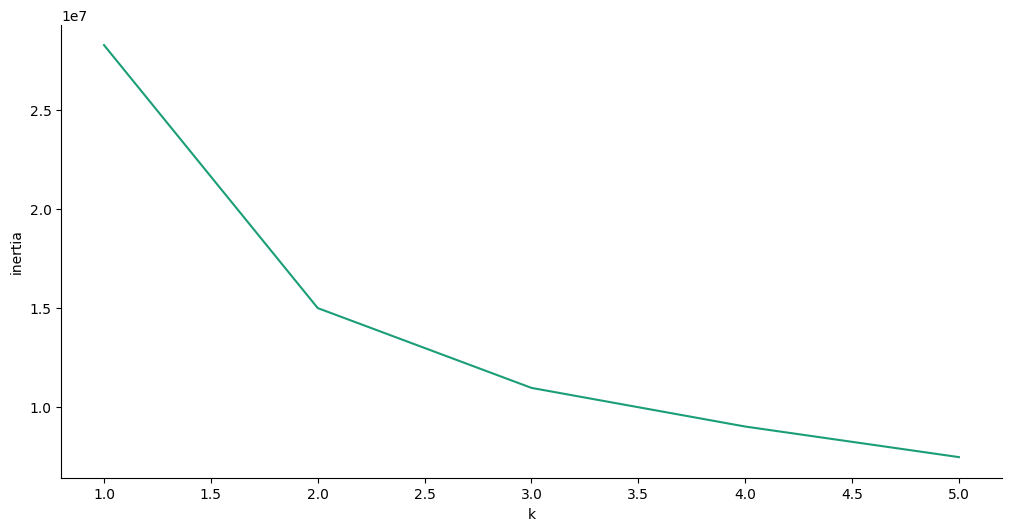

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['k']
  ys = series['inertia']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('k', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('k')
_ = plt.ylabel('inertia')

In [77]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(pca_df)

# Predict clusters
k_3 = model.predict(pca_df)

# Create a copy of the PCA DataFrame
pca_df_predictions = pca_df.copy()

# Add the predicted class columns
pca_df_predictions['heart_segments'] = k_3

# Review the DataFrame
pca_df_predictions.head()

,PC1,PC2,PC3,heart_segments
0,-10.609825,-2.536646,-3.161678,1
1,12.561033,-6.592460,-0.194282,0
2,26.085138,-7.269181,-0.081837,2
3,8.674411,-2.660908,-3.623652,0
4,-1.581465,6.509707,8.838973,0


In [78]:
# Plot the clusters
pca_df_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="heart_segments",
    title="Clusters of Heart Disease"
)

:NdOverlay   [heart_segments]
   :Scatter   [PC1]   (PC2)

In [79]:
model.score(pca_df)

-10979069.23591721

## Clean the code then go again

In [80]:
df1.head()

,State,Sex,GenHealth,PhysicalHealth,MentalHealth,LastCheckupTime,PhysicalActivity,SleepHours,RemovedTeeth,HeartAttack,...,HeightInMeters,WeightInKilograms,BMI,Drinking,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [92]:
# Remove unneccessary columns using drop()
columns_to_drop = [
    'LastCheckupTime', 'RemovedTeeth', 'HadCOPD',
    'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating',
    'DifficultyDressingBathing', 'DifficultyErrands',
    'HeightInMeters', 'WeightInKilograms',
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
    'HighRiskLastYear', 'CovidPos'
]
df2 = df1.drop(columns=columns_to_drop)
df2.head()

,State,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepHours,HeartAttack,Angina,Stroke,...,KidneyDisease,Diabetes,DiffWalking,Smoking,ECigaretteUsage,ChestScan,Race,Age,BMI,Drinking
342,Alabama,Female,Very good,4.0,0.0,Yes,9.0,No,No,No,...,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,27.99,No
343,Alabama,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,...,No,Yes,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,30.13,No
345,Alabama,Male,Very good,0.0,0.0,No,8.0,No,No,No,...,No,No,Yes,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,31.66,Yes
346,Alabama,Female,Fair,5.0,0.0,Yes,9.0,No,No,No,...,No,No,Yes,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,31.32,No
347,Alabama,Female,Good,3.0,15.0,Yes,5.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,33.07,No


In [93]:
# Renaming columns using a dictionary
df2 = df2.rename(columns={
    'AgeCategory': "Age",
    'RaceEthnicityCategory': "Race",
    'GeneralHealth': "GenHealth",
    'PhysicalHealthDays': "PhysicalHealth",
    'PhysicalActivities': "PhysicalActivity",
    'MentalHealthDays': "MentalHealth",
    'HadAngina': "Angina",
    'HadHeartAttack': "HeartAttack",
    'HadStroke': "Stroke",
    'HadAsthma': "Asthma",
    'HadSkinCancer': "SkinCancer",
    'HadDepressiveDisorder': "Depressed",
    'HadKidneyDisease': "KidneyDisease",
    'DifficultyWalking': "DiffWalking",
    'HadDiabetes': "Diabetes",
    'SmokerStatus': "Smoking",
    'AlcoholDrinkers': "Drinking"
})
df2

,State,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepHours,HeartAttack,Angina,Stroke,...,KidneyDisease,Diabetes,DiffWalking,Smoking,ECigaretteUsage,ChestScan,Race,Age,BMI,Drinking
342,Alabama,Female,Very good,4.0,0.0,Yes,9.0,No,No,No,...,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,27.99,No
343,Alabama,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,...,No,Yes,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,30.13,No
345,Alabama,Male,Very good,0.0,0.0,No,8.0,No,No,No,...,No,No,Yes,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,31.66,Yes
346,Alabama,Female,Fair,5.0,0.0,Yes,9.0,No,No,No,...,No,No,Yes,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,31.32,No
347,Alabama,Female,Good,3.0,15.0,Yes,5.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,33.07,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87540,Hawaii,Male,Good,0.0,0.0,Yes,9.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 35 to 39,19.67,Yes
87541,Hawaii,Female,Good,0.0,3.0,Yes,1.0,No,No,No,...,No,No,No,Never smoked,Not at all (right now),No,"Other race only, Non-Hispanic",Age 25 to 29,19.42,No
87545,Hawaii,Female,Excellent,0.0,0.0,Yes,8.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 60 to 64,32.22,Yes
87548,Hawaii,Male,Very good,1.0,5.0,Yes,6.0,No,No,No,...,No,No,No,Never smoked,Use them some days,Yes,"Other race only, Non-Hispanic",Age 18 to 24,26.25,No


Convert categorical variables to numerical variables

In [94]:
# Identify binary columns
# The condition checks if the column has exactly 2 unique values using the nunique()
binary_cols = [col for col in df2.columns if df1[col].nunique() == 2]
binary_cols

['Sex',
 'PhysicalActivity',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'DiffWalking',
 'ChestScan',
 'Drinking']

In [95]:
# Copy df1 to df2
df3 = df2.copy()

# Then, drop column named "State"
df3 = df3.drop("State", axis=1)

In [96]:
df3.columns

Index(['Sex', 'GenHealth', 'PhysicalHealth', 'MentalHealth',
       'PhysicalActivity', 'SleepHours', 'HeartAttack', 'Angina', 'Stroke',
       'Asthma', 'SkinCancer', 'Depressed', 'KidneyDisease', 'Diabetes',
       'DiffWalking', 'Smoking', 'ECigaretteUsage', 'ChestScan', 'Race', 'Age',
       'BMI', 'Drinking'],
      dtype='object')

In [97]:
# Convert and verify binary columns
all_binary = True

for col in binary_cols:
    unique_values = df3[col].unique()
    if set(unique_values) != {0, 1}:
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        df3[col] = df3[col].map(mapping)

    # Verify conversion
    if set(df3[col].unique()) != {0, 1}:
        all_binary = False
        print(f"Column {col} has non-binary values: {set(df3[col].unique())}")

if all_binary:
    print("All binary columns have been successfully converted to 0 and 1.")
else:
    print("Some columns still have non-binary values.")

All binary columns have been successfully converted to 0 and 1.
